# ML Marathon
## Problem Definition
The `data` is related to direct marketing campaigns of a financial institution.The marketing
campaigns were based on phone calls. Often, more than one contact to the same client was
required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no')
subscribed. You will have to analyze the dataset in order to find ways to look for future
strategies in order to improve future marketing campaigns for the bank.
## Data 
provided by reskill_l: reskilll.com/hack/mlmarathon
## Evaluation
1. Precision
2. Recall
3. F1 Score
## Features
1. age (numeric)
2. - job : type of job (categorical:
'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','
student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced'
means divorced or widowed)
4. - education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unk
nown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - balance:
7. - housing: has housing loan? (categorical: 'no','yes','unknown')
8. - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: 'cellular','telephone')
10. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Output variable (desired target):
17. - deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
#import some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
#Lets import Dataset
df=pd.read_csv("../input/ml-marathon/data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [5]:
#Lets check some statistic
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**NO NULL values**

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


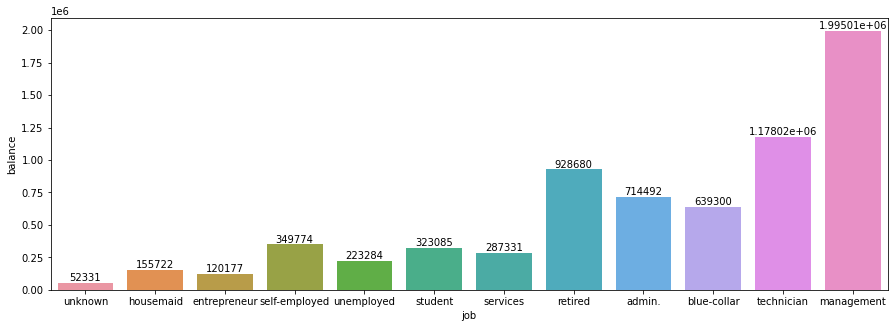

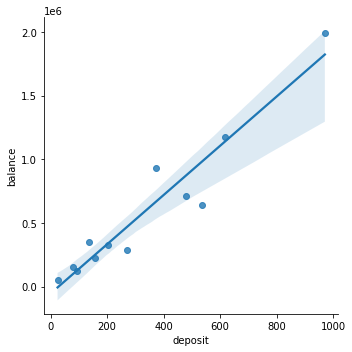

In [8]:
#lets explore data
deposites=df[df['deposit']=='yes']
deposite_per_job=deposites.groupby('job').agg({"deposit":"count"})
job_balance=deposites.groupby('job').agg({'balance':"sum"})
job_balance=job_balance.merge(deposite_per_job,on='job')
job_balance=job_balance.sort_values(by='deposit')
plt.figure(figsize=(15,5))
ax=sns.barplot(data=job_balance, x=job_balance.index, y="balance")
ax.bar_label(ax.containers[0])
sns.lmplot(x="deposit", y="balance", data=job_balance)
plt.show()

**As the balance increases(depending upon job) chance for deposite also increase. As it can be observed by the trend line that (ignoring unknown) lowest balance is for housemaid so the no of deposit from housemaid is also low and similarly the maximum balance is for management and maximum deposit is from this sector**

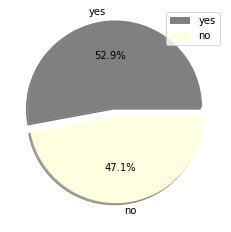

In [9]:
plt.pie(df['deposit'].value_counts(),autopct="%1.1f%%",explode=[0.1,0],shadow=True,labels=['yes','no'],colors=['gray','lightyellow'],textprops={'color':"black"});
plt.legend();

**We came to know that there is not much imbalancement in dataset Hence there is requirement of over_Sampling or under_sampling**

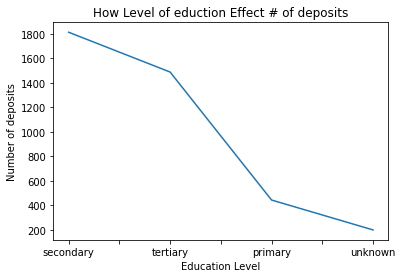

In [10]:
deposites['education'].value_counts().plot();
plt.xlabel("Education Level")
plt.ylabel("Number of deposits")
plt.title("How Level of eduction Effect # of deposits")
plt.show()

**Up till now we have found that** 
1. More balance more chances of deposits
2. People with Secondary Level Education show more interest in deposits
#### Now lets check which age group takes interest in deposits

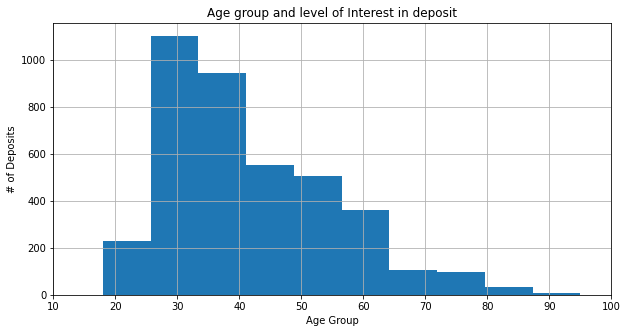

In [11]:
plt.figure(figsize=(10,5))
deposites['age'].hist()
plt.xlim(10,100);
plt.xlabel("Age Group")
plt.ylabel("# of Deposits")
plt.title("Age group and level of Interest in deposit");

**Up till now we have found that** 
1. More balance more chances of deposits
2. People with Secondary Level Education show more interest in deposits
3. It is clear that age group between 25 - 35
#### Lets try to check all other relationship using correlations

In [12]:
data_length=len(df)
data_length

8371

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [14]:
df['default'].value_counts()

no     8244
yes     127
Name: default, dtype: int64

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [16]:
def preprocess(df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label]=pd.Categorical(content).codes
    return df
df=preprocess(df)

In [17]:
data_length=len(df)
data_length

8371

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,9,1,2,0,127,1,0,0,14,10,113,1,50,2,2,0
1,41,3,1,0,0,365,0,0,0,8,1,203,5,-1,0,3,0
2,39,4,2,2,0,2454,1,0,0,4,8,716,3,263,2,0,1
3,49,1,1,0,0,6215,1,0,0,11,8,549,1,-1,0,3,0
4,37,7,1,1,0,1694,1,1,0,29,4,404,2,251,6,0,0


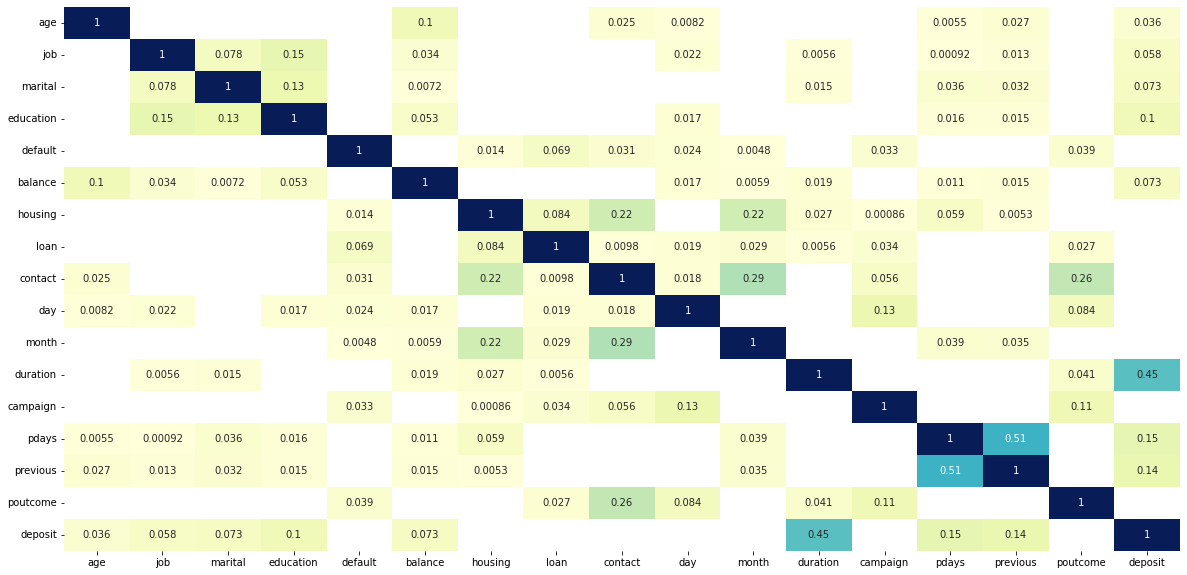

In [19]:
fig , ax = plt.subplots(figsize=(20,10))
df_corr=df.corr()
co=sns.heatmap(df_corr[df_corr>0],
               annot=True,cbar=False,cmap="YlGnBu");

Relation between deposit and duration is very strong > then pdays>previous

In [20]:
## Time to split dataset
X=df.drop('deposit',axis=1)
y=df['deposit']

In [21]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38,9,1,2,0,127,1,0,0,14,10,113,1,50,2,2
1,41,3,1,0,0,365,0,0,0,8,1,203,5,-1,0,3
2,39,4,2,2,0,2454,1,0,0,4,8,716,3,263,2,0
3,49,1,1,0,0,6215,1,0,0,11,8,549,1,-1,0,3
4,37,7,1,1,0,1694,1,1,0,29,4,404,2,251,6,0


In [22]:
#lets split the data in train and test
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

# Modelling

**Random forest improves bagging by introducing splitting to decorrelate the tree into 
a random subset of features. This means that each time the tree is split, the model only considers 
a small subset of the features of the model rather than all of them.**

In [23]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train);

In [24]:
np.random.seed(42)
model.score(x_train,y_train) #checking well model has set weights upon training dataset

1.0

In [25]:
np.random.seed(42)
model.score(x_test,y_test)

0.8465671641791045

#### We are just going to improve Random Forest Regressor

* GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [27]:
CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 200}

In [28]:
np.random.seed(42)
CV_rfc.score(x_train,y_train)

1.0

In [29]:
np.random.seed(42)
CV_rfc.score(x_test,y_test)

0.8453731343283583

**No improvement**

**Gradient-enhanced trees can be more accurate than random forests. They are trained to correct each other's mistakes, so they can pick up complex patterns in the data.**

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train);

In [31]:
np.random.seed(42)
model.score(x_train,y_train) #checking well model has set weights upon training dataset

0.8599163679808841

In [32]:
np.random.seed(42)
model.score(x_test,y_test)

0.8507462686567164

**Logistic regression is very efficient to implement, interpret and train. Classifying unknown records is very fast. Works well when the dataset is linearly separable. Model coefficients can be interpreted as a measure of feature importance.**

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [34]:
lr.score(x_train,y_train)

0.758363201911589

In [35]:
lr.score(x_test,y_test)

0.7713432835820896

**We will move with Gradient Boosting Classifier Because with Random Forest Classifier we are getting `overfitting` issue and with logistic regression we are getting very low accuracy**

In [78]:
## Evaluation
np.random.seed(42)
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score
y_pred=model.predict(x_test)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       886
           1       0.84      0.85      0.84       789

    accuracy                           0.85      1675
   macro avg       0.85      0.85      0.85      1675
weighted avg       0.85      0.85      0.85      1675



In [80]:
precision_score(y_test,y_pred)

0.8356164383561644

In [81]:
recall_score(y_test,y_pred)

0.8504435994930292

In [82]:
f1_score(y_test,y_pred)

0.8429648241206031

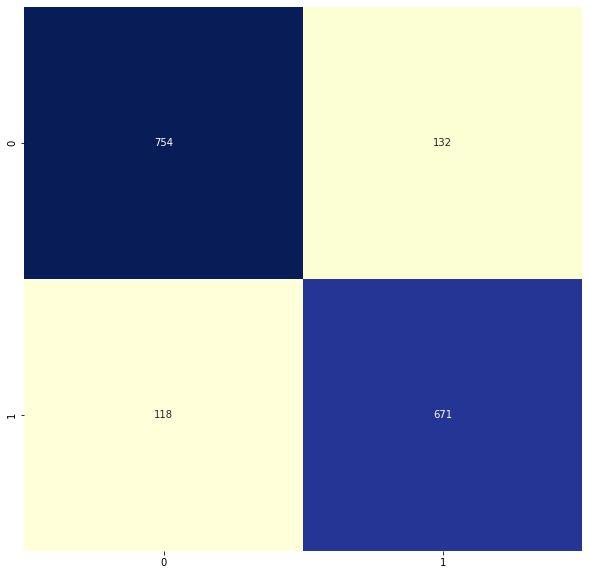

In [85]:
fig , ax = plt.subplots(figsize=(10,10))
co=sns.heatmap(confusion_matrix(y_test,y_pred),
               annot=True,cbar=False,cmap="YlGnBu",fmt='d');

In [86]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int8)

In [92]:
test=pd.read_csv('../input/ml-marathon/test_data.csv')
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [93]:
test.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [94]:
test=preprocess(test)

In [95]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,1,2,1,1,477,0,0,0,20,9,426,2,189,6,0
1,49,1,1,0,0,599,0,0,0,23,5,464,1,-1,0,3
2,51,6,2,2,0,400,0,1,0,27,8,200,1,-1,0,3
3,33,9,1,1,0,488,1,0,2,8,8,703,1,-1,0,3
4,34,0,1,1,0,40,1,0,1,5,8,125,2,-1,0,3


In [96]:
result=model.predict(test)

In [98]:
result=pd.DataFrame(result,columns=['deposit'])

In [99]:
result.head()

,deposit
0,1
1,1
2,0
3,1
4,0


In [101]:
result.to_csv('result.csv',index=False)